In [ ]:
import pandas as pd
import numpy as np

# **Importing the libraries**

> ## **Importing Algorithms**




In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

> ## **Importing Encoders**

In [ ]:
from sklearn.preprocessing import LabelEncoder

## **Importing Visualising Libaries**

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# **Importing the dataset**

In [ ]:
dt_train = pd.read_csv("train.csv")
dt_test = pd.read_csv("test.csv")
dt_train.head(7)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S


In [ ]:
dt_test.head(7)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q


#**Data Analysis**





In [ ]:
dt_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
total = dt_train.isnull().sum().sort_values(ascending=False)
percent = dt_train.isnull().sum() / dt_train.isnull().count() * 100
missingData = pd.concat([total, round(percent, 2).sort_values(ascending=False)], axis=1, keys=["Total", "Percentage"])
missingData.head(12)

,Total,Percentage
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22
Fare,0,0.00
Ticket,0,0.00
Parch,0,0.00
SibSp,0,0.00
Sex,0,0.00
Name,0,0.00
Pclass,0,0.00


> ## **PassengerId**

In [ ]:
len(dt_train.PassengerId.unique())

891


> ## **Pclass**



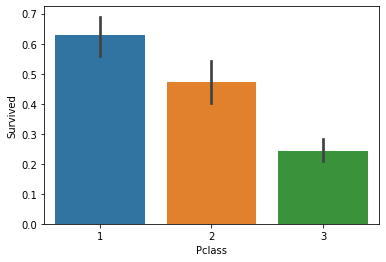

In [ ]:
sns.barplot(x="Pclass", y="Survived" , data=dt_train)

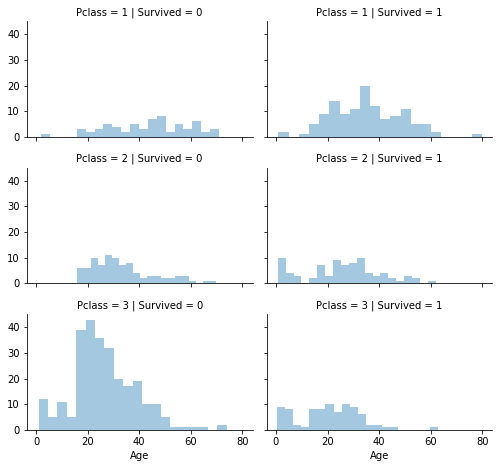

In [ ]:
grid = sns.FacetGrid(dt_train, col="Survived", row="Pclass", height=2.2, aspect=1.6)
grid.map(plt.hist, "Age", alpha=0.4, bins= 20)
plt.show()

> ## **Age and Sex**

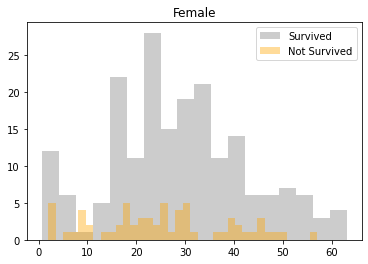

In [ ]:
women = dt_train[dt_train['Sex']=='female']
plt.hist(women[women['Survived']==1].Age.dropna(), bins=18, label = "Survived", color="grey", alpha=0.4)
plt.hist(women[women['Survived']==0].Age.dropna(), bins=36, label = "Not Survived", color="orange", alpha=0.4)
plt.legend()
plt.title('Female')
plt.show()

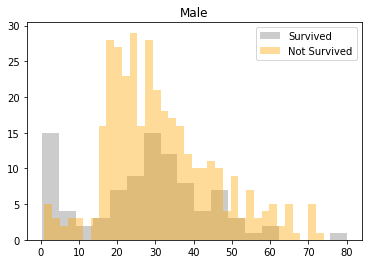

In [ ]:
men = dt_train[dt_train['Sex']=='male']
plt.hist(men[men['Survived']==1].Age.dropna(), bins=18, label = "Survived", color="grey", alpha=0.4)
plt.hist(men[men['Survived']==0].Age.dropna(), bins=36, label = "Not Survived", color="orange", alpha=0.4)
plt.legend()
plt.title('Male')
plt.show()

> ## **SibSp and Parch**

In [ ]:
compare = pd.concat([dt_train.SibSp, dt_train.Parch, dt_train.Survived], axis = 1, keys=["SibSp", "Parch", "Survived"])
compare["Relatives"] = compare["SibSp"] + compare["Parch"]
compare.head(17)

,SibSp,Parch,Survived,Relatives
0,1,0,0,1
1,1,0,1,1
2,0,0,1,0
3,1,0,1,1
4,0,0,0,0
5,0,0,0,0
6,0,0,0,0
7,3,1,0,4
8,0,2,1,2
9,1,0,1,1


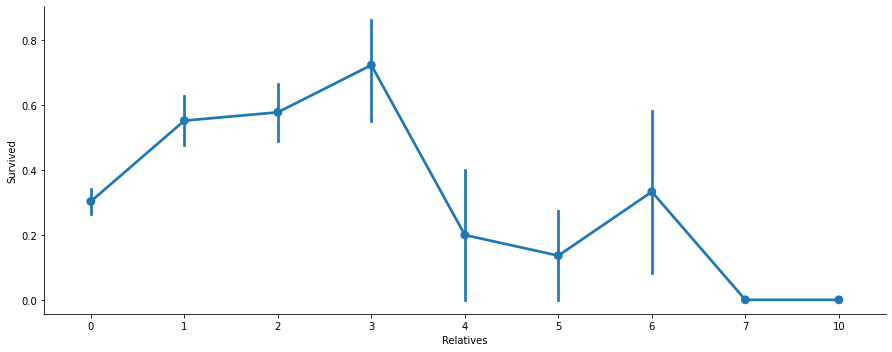

In [ ]:
axes = sns.catplot('Relatives','Survived', data=compare, aspect = 2.5, kind="point" )

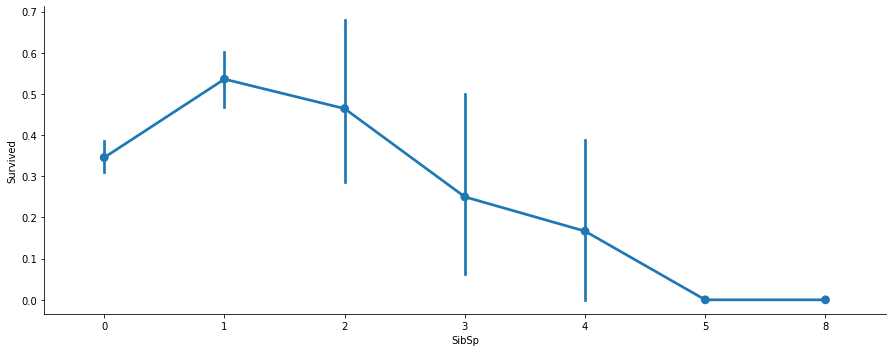

In [ ]:
axes = sns.catplot('SibSp','Survived', data=compare, aspect = 2.5, kind="point" )

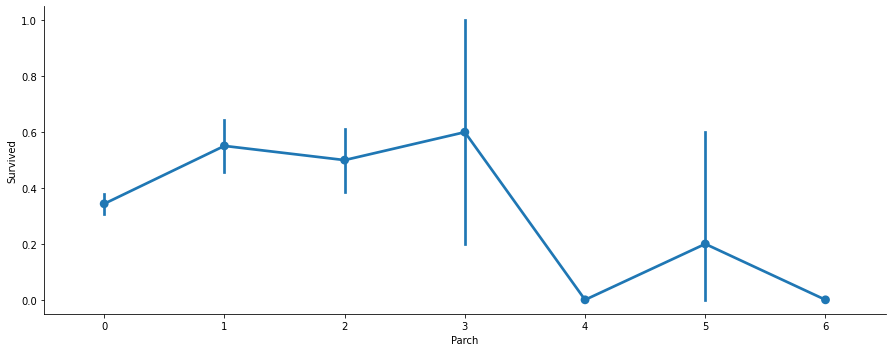

In [ ]:
axes = sns.catplot('Parch','Survived', data=compare, aspect = 2.5, kind="point" )

> ## **Ticket and Cabin**

In [ ]:
len(dt_train.Ticket.unique())

681

In [ ]:
dt_train.Ticket.count()

891

In [ ]:
compare = pd.concat([dt_train.Ticket, dt_train.Cabin], axis = 1, keys=["Ticket", "Cabin"])
compare.head(7)

,Ticket,Cabin
0,A/5 21171,NaN
1,PC 17599,C85
2,STON/O2. 3101282,NaN
3,113803,C123
4,373450,NaN
5,330877,NaN
6,17463,E46


In [ ]:
(891-681)/891 * 100

23.56902356902357

In [ ]:
compare['Cabin_Filled'] = compare['Ticket'].map(compare.groupby('Ticket')['Cabin'].first())
compare

,Ticket,Cabin,Cabin_Filled
0,A/5 21171,NaN,NaN
1,PC 17599,C85,C85
2,STON/O2. 3101282,NaN,NaN
3,113803,C123,C123
4,373450,NaN,NaN
...,...,...,...
886,211536,NaN,NaN
887,112053,B42,B42
888,W./C. 6607,NaN,NaN
889,111369,C148,C148


In [ ]:
compare.Cabin.isnull().sum()

687

In [ ]:
compare.Cabin_Filled.isnull().sum()

676

In [ ]:
compare.Cabin_Filled.isnull().count()

891

In [ ]:
(891-676)/891 * 100

24.130190796857466

In [ ]:
(687/891 * 100)-(676/891 * 100)

1.2345679012345698

> ## **Fare**

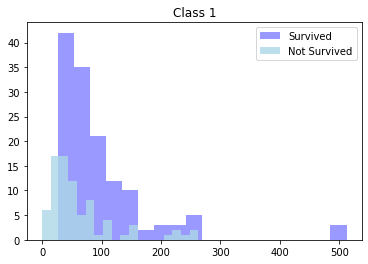

In [ ]:
class1 = dt_train[dt_train['Pclass']==1]
plt.hist(class1[class1['Survived']==1].Fare.dropna(), bins=18, label = "Survived", color="blue", alpha=0.4)
plt.hist(class1[class1['Survived']==0].Fare.dropna(), bins=18, label = "Not Survived", color="lightblue", alpha=0.8)
plt.legend()
plt.title('Class 1')
plt.show()

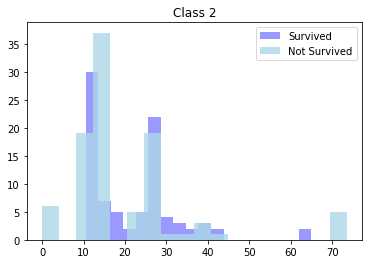

In [ ]:
class2 = dt_train[dt_train['Pclass']==2]
plt.hist(class2[class2['Survived']==1].Fare.dropna(), bins=18, label = "Survived", color="blue", alpha=0.4)
plt.hist(class2[class2['Survived']==0].Fare.dropna(), bins=18, label = "Not Survived", color="lightblue", alpha=0.8)
plt.legend()
plt.title('Class 2')
plt.show()

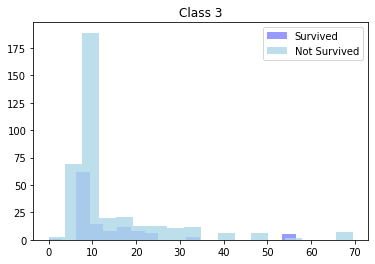

In [ ]:
class3 = dt_train[dt_train['Pclass']==3]
plt.hist(class3[class3['Survived']==1].Fare.dropna(), bins=18, label = "Survived", color="blue", alpha=0.4)
plt.hist(class3[class3['Survived']==0].Fare.dropna(), bins=18, label = "Not Survived", color="lightblue", alpha=0.8)
plt.legend()
plt.title('Class 3')
plt.show()

> ## **Embarked, Pclass and Sex**

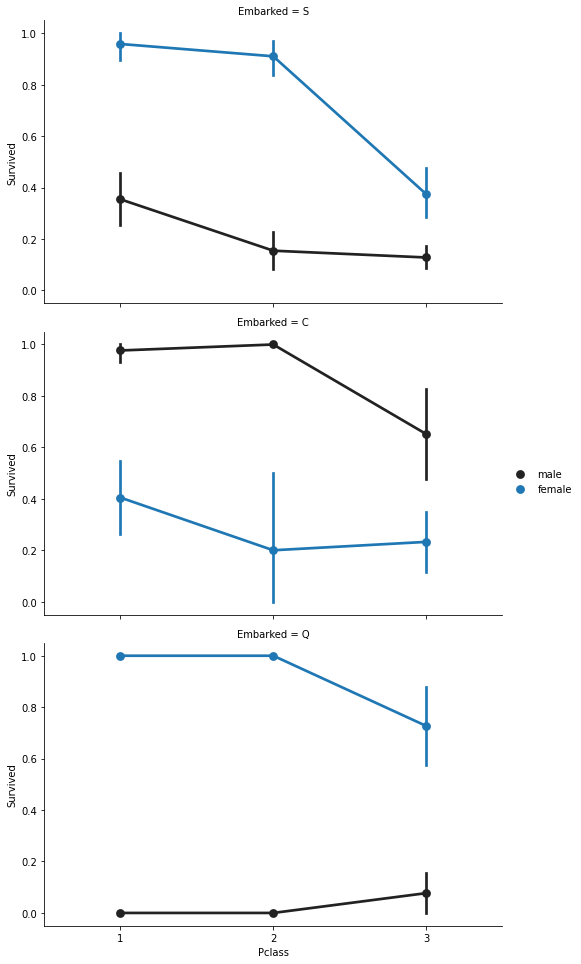

In [ ]:
FacetGrid = sns.FacetGrid(dt_train, row='Embarked', height=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

> ## **Name and Cabin**

In [ ]:
len(dt_train.Name.unique())

891

In [ ]:
dt_train.Name.count()

891

In [ ]:
compare = pd.concat([dt_train.Name, dt_train.Cabin], axis = 1, keys=["Name", "Cabin"])
compare

,Name,Cabin
0,"Braund, Mr. Owen Harris",NaN
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",C85
2,"Heikkinen, Miss. Laina",NaN
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",C123
4,"Allen, Mr. William Henry",NaN
...,...,...
886,"Montvila, Rev. Juozas",NaN
887,"Graham, Miss. Margaret Edith",B42
888,"Johnston, Miss. Catherine Helen ""Carrie""",NaN
889,"Behr, Mr. Karl Howell",C148


In [ ]:
lastname= []
for i in range(0, dt_train.Name.count()):
  last = compare["Name"][i]
  last = last.split()[0]
  lastname.append(last)


In [ ]:
compare["Lastname"] = np.array(lastname)
compare

,Name,Cabin,Lastname
0,"Braund, Mr. Owen Harris",NaN,"Braund,"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",C85,"Cumings,"
2,"Heikkinen, Miss. Laina",NaN,"Heikkinen,"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",C123,"Futrelle,"
4,"Allen, Mr. William Henry",NaN,"Allen,"
...,...,...,...
886,"Montvila, Rev. Juozas",NaN,"Montvila,"
887,"Graham, Miss. Margaret Edith",B42,"Graham,"
888,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,"Johnston,"
889,"Behr, Mr. Karl Howell",C148,"Behr,"


In [ ]:
len(compare.Lastname.unique())

661

In [ ]:
compare.Lastname.count()

891

In [ ]:
compare['Cabin_Filled'] = compare['Lastname'].map(compare.groupby('Lastname')['Cabin'].first())
compare

,Name,Cabin,Lastname,Cabin_Filled
0,"Braund, Mr. Owen Harris",NaN,"Braund,",NaN
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",C85,"Cumings,",C85
2,"Heikkinen, Miss. Laina",NaN,"Heikkinen,",NaN
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",C123,"Futrelle,",C123
4,"Allen, Mr. William Henry",NaN,"Allen,",B5
...,...,...,...,...
886,"Montvila, Rev. Juozas",NaN,"Montvila,",NaN
887,"Graham, Miss. Margaret Edith",B42,"Graham,",C125
888,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,"Johnston,",NaN
889,"Behr, Mr. Karl Howell",C148,"Behr,",C148


In [ ]:
compare.Cabin.isnull().sum()

687

In [ ]:
compare.Cabin_Filled.isnull().sum()

664

In [ ]:
compare.Cabin.isnull().count()

891

In [ ]:
(891-664)/891 * 100

25.476992143658812

In [ ]:
664/891 *100

74.5230078563412

In [ ]:
687/891 * 100


77.10437710437711

In [ ]:
(687-664)/891 * 100

2.581369248035915

# **Data Preprocessing: Missing Data**

> ## **Cabin**

In [ ]:
import re
deck = {"A": 1,"B": 2, "C":3,"D": 4, "E": 5,"F": 6, "G": 7,"U": 8}
data = [dt_train, dt_test]
for i in data:
  i['Cabin_Filled'] = i['Ticket'].map(i.groupby('Ticket')['Cabin'].first())
  lastname= []
  for j in range(0, i.Name.count()):
    last = i["Name"][j]
    last = last.split()[0]
    lastname.append(last)
  i["Lastname"] = np.array(lastname)
  i['Cabin_Filled'] = i['Lastname'].map(i.groupby('Lastname')['Cabin'].first())
  i['Cabin_Filled'] = i['Cabin_Filled'].fillna("U0")
  i['Deck'] = i['Cabin_Filled'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
  i['Deck'] = i['Deck'].map(deck)
  i['Deck'] = i['Deck'].fillna(0)
  i['Deck'] = i['Deck'].astype(int)


In [ ]:
dt_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Filled,Lastname,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,U0,"Braund,",8
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,C85,"Cumings,",3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,U0,"Heikkinen,",8
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,C123,"Futrelle,",3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,B5,"Allen,",2


In [ ]:
dt_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cabin_Filled,Lastname,Deck
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,U0,"Kelly,",8
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,U0,"Wilkes,",8
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,U0,"Myles,",8
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,U0,"Wirz,",8
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,U0,"Hirvonen,",8


In [ ]:
dt_train = dt_train.drop(["Cabin","Cabin_Filled","Lastname","Ticket"], axis=1)
dt_test = dt_test.drop(["Cabin","Cabin_Filled","Lastname","Ticket"], axis=1)

In [ ]:
dt_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,8
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,8
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,2


In [ ]:
dt_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,8
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,8
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,8
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,8
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,8


> ## **Age**

In [ ]:
data = [dt_train, dt_test]
for i in data:
    mean = dt_train["Age"].mean()
    std = dt_test["Age"].std()
    is_null = i["Age"].isnull().sum()
    randomAge = np.random.randint(mean - std, mean + std, size = is_null)
    ageGroup = i["Age"].copy()
    ageGroup[np.isnan(ageGroup)] = randomAge
    i["Age"] = ageGroup
    i["Age"] = dt_train["Age"].astype(int)
dt_train["Age"].isnull().sum()

0

> ## **Embarked**

In [ ]:
dt_train["Embarked"].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [ ]:
data = [dt_train, dt_test]
for i in data:
    i['Embarked'] = i['Embarked'].fillna("S")

In [ ]:
dt_train["Embarked"].describe()

count     891
unique      3
top         S
freq      646
Name: Embarked, dtype: object

# **Data Preprocessing: Converting Features**

In [ ]:
dt_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Fare         891 non-null    float64
 9   Embarked     891 non-null    object 
 10  Deck         891 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 76.7+ KB


> ## **PassengerId**

In [ ]:
dt_train = dt_train.drop(["PassengerId"], axis=1)
dt_test = dt_test.drop(["PassengerId"], axis=1)

> ## **Name**

In [ ]:
data=[dt_train, dt_test]
titles = set()
for i in data:
  for name in i['Name']:
    titles.add(name.split(',')[1].split('.')[0].strip())

print(titles)
# set(['Sir', 'Major', 'the Countess', 'Don', 'Mlle', 'Capt', 'Dr', 'Lady', 'Rev', 'Mrs', 'Jonkheer', 'Master', 'Ms', 'Mr', 'Mme', 'Miss', 'Col'])

Title_Dictionary = {
    "Capt": "Officer",
    "Col": "Officer",
    "Major": "Officer",
    "Jonkheer": "Royalty",
    "Don": "Royalty",
    "Dona": "Royalty",
    "Sir" : "Royalty",
    "Dr": "Officer",
    "Rev": "Officer",
    "the Countess":"Royalty",
    "Mme": "Mrs",
    "Mlle": "Miss",
    "Ms": "Mrs",
    "Mr" : "Mr",
    "Mrs" : "Mrs",
    "Miss" : "Miss",
    "Master" : "Master",
    "Lady" : "Royalty"
}

for i in data:
  # we extract the title from each name
  i['Title'] = i['Name'].map(lambda name:name.split(',')[1].split('.')[0].strip())
  # a map of more aggregated title
  # we map each title
  i['Title'] = i.Title.map(Title_Dictionary)


{'Don', 'Mme', 'Sir', 'the Countess', 'Major', 'Ms', 'Mrs', 'Master', 'Lady', 'Capt', 'Mr', 'Rev', 'Dr', 'Dona', 'Mlle', 'Miss', 'Jonkheer', 'Col'}


In [ ]:
dt_train =dt_train.drop(["Name"],axis =1)
dt_test = dt_test.drop(["Name"], axis =1)

In [ ]:
titleEnc = LabelEncoder()
data = [dt_train,dt_test]
for i in data:
  i["Title"]= titleEnc.fit_transform(i["Title"])


In [ ]:
dt_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title
0,0,3,male,22,1,0,7.2500,S,8,2
1,1,1,female,38,1,0,71.2833,C,3,3
2,1,3,female,26,0,0,7.9250,S,8,1
3,1,1,female,35,1,0,53.1000,S,3,3
4,0,3,male,35,0,0,8.0500,S,2,2


> ## **Sex**

In [ ]:
sexEnc = LabelEncoder()
data = [dt_train, dt_test]
for i in data:
  i["Sex"] = sexEnc.fit_transform(i["Sex"])


In [ ]:
dt_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Title
0,0,3,1,22,1,0,7.2500,S,8,2
1,1,1,0,38,1,0,71.2833,C,3,3
2,1,3,0,26,0,0,7.9250,S,8,1
3,1,1,0,35,1,0,53.1000,S,3,3
4,0,3,1,35,0,0,8.0500,S,2,2


> ## **SibSp and Parch**

In [ ]:
dt_train = dt_train.drop(["SibSp","Parch"], axis =1)
dt_test = dt_test.drop(["SibSp","Parch"], axis =1)

In [ ]:
dt_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Deck,Title
0,0,3,1,22,7.2500,S,8,2
1,1,1,0,38,71.2833,C,3,3
2,1,3,0,26,7.9250,S,8,1
3,1,1,0,35,53.1000,S,3,3
4,0,3,1,35,8.0500,S,2,2


> ## **Fare**

In [ ]:
data = [dt_train, dt_test]
for i in data:
    i['Fare'] = i['Fare'].fillna(0)
    i['Fare'] = i['Fare'].astype(int)

In [ ]:
dt_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Deck,Title
0,0,3,1,22,7,S,8,2
1,1,1,0,38,71,C,3,3
2,1,3,0,26,7,S,8,1
3,1,1,0,35,53,S,3,3
4,0,3,1,35,8,S,2,2


> ## **Embarked**

In [ ]:
embarkedEnc = LabelEncoder()
data = [dt_train, dt_test]
for i in data:
  i["Embarked"] = embarkedEnc.fit_transform(i["Embarked"])


In [ ]:
dt_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Deck,Title
0,0,3,1,22,7,2,8,2
1,1,1,0,38,71,0,3,3
2,1,3,0,26,7,2,8,1
3,1,1,0,35,53,2,3,3
4,0,3,1,35,8,2,2,2


In [ ]:
dt_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Survived  891 non-null    int64
 1   Pclass    891 non-null    int64
 2   Sex       891 non-null    int64
 3   Age       891 non-null    int64
 4   Fare      891 non-null    int64
 5   Embarked  891 non-null    int64
 6   Deck      891 non-null    int64
 7   Title     891 non-null    int64
dtypes: int64(8)
memory usage: 55.8 KB


# **Creating Categories**

> ## **Age**

In [ ]:
data=[dt_train, dt_test]
for i in data:
  i.loc[ i['Age'] <= 11, 'Age'] = 0
  i.loc[(i['Age'] > 11) & (i['Age'] <= 18), 'Age'] = 1
  i.loc[(i['Age'] > 18) & (i['Age'] <= 22), 'Age'] = 2
  i.loc[(i['Age'] > 22) & (i['Age'] <= 27), 'Age'] = 3
  i.loc[(i['Age'] > 27) & (i['Age'] <= 33), 'Age'] = 4
  i.loc[(i['Age'] > 33) & (i['Age'] <= 40), 'Age'] = 5
  i.loc[(i['Age'] > 40) & (i['Age'] <= 66), 'Age'] = 6
  i.loc[ i['Age'] > 66, 'Age'] = 6


In [ ]:
dt_train.Age.value_counts()

4    169
6    158
5    152
3    132
2    110
1    102
0     68
Name: Age, dtype: int64

> ## **Fare**

In [ ]:
pd.qcut(dt_train["Fare"], q=7)

0      (-0.001, 7.0]
1      (56.0, 512.0]
2      (-0.001, 7.0]
3       (27.0, 56.0]
4         (7.0, 8.0]
           ...      
886     (12.0, 19.0]
887     (27.0, 56.0]
888     (19.0, 27.0]
889     (27.0, 56.0]
890    (-0.001, 7.0]
Name: Fare, Length: 891, dtype: category
Categories (7, interval[float64]): [(-0.001, 7.0] < (7.0, 8.0] < (8.0, 12.0] < (12.0, 19.0] <
                                    (19.0, 27.0] < (27.0, 56.0] < (56.0, 512.0]]

In [ ]:
data = [dt_train, dt_test]
for i in data:
  i.loc[i["Fare"]<=7.0, "Fare"] = 0
  i.loc[(i["Fare"]> 7.0) & (i["Fare"]<=8.0), "Fare"] = 1
  i.loc[(i["Fare"]> 8.0) & (i["Fare"]<=12.0), "Fare"] = 2
  i.loc[(i["Fare"]> 12.0) & (i["Fare"]<=19.0), "Fare"] = 3
  i.loc[(i["Fare"]> 19.0) & (i["Fare"]<=27.0), "Fare"] = 4
  i.loc[(i["Fare"]> 27.0) & (i["Fare"]<=56.0), "Fare"] = 5
  i.loc[(i["Fare"]> 56.0) & (i["Fare"]<=512.0), "Fare"] = 7


In [ ]:
dt_train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Deck,Title
0,0,3,1,2,0,2,8,2
1,1,1,0,5,7,0,3,3
2,1,3,0,3,0,2,8,1
3,1,1,0,5,5,2,3,3
4,0,3,1,5,1,2,2,2


# **Building the Models**

In [ ]:
x_train = dt_train.drop("Survived", axis=1)
Y_train = dt_train["Survived"]
X_test  = dt_test


> ## **Logistic Regression**

In [ ]:
LogReg = LogisticRegression(random_state = 0)
LogReg.fit(x_train, y_train)
y_pred = LogReg.predict(x_test)
accLogReg = round(LogReg.score(x_train,y_train) * 100, 2)
print(accLogReg)

78.68


> ## **K- Nearest Neighbors Classification**

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)
accKnn = round(knn.score(x_train,y_train)*100, 2)
print(accKnn)

83.84


> ## **Support Vector Classification(Linear)**

In [ ]:
svc = SVC(kernel = 'linear', random_state = 0)
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)
accSvc = round(svc.score(x_train,y_train)*100, 2)
print(accSvc)

78.68


> ## **Support Vector Classification(rbf)**

In [ ]:
rbf = SVC(kernel = 'rbf', random_state = 0)
rbf.fit(x_train, y_train)
y_pred = rbf.predict(x_test)
accRbf = round(rbf.score(x_train,y_train)*100, 2)
print(accRbf)

80.47


> ## **Naive Bayes**

In [ ]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred = gnb.predict(x_test)
accGnb = round(gnb.score(x_train,y_train)*100, 2)
print(accGnb)

75.2


> ## **Decision Tree Classification**

In [ ]:
dtc = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dtc.fit(x_train, y_train)
y_pred = dtc.predict(x_test)
accDtc = round(dtc.score(x_train,y_train)*100, 2)
print(accDtc)

90.91


> ## **Random Forest Classification**

In [ ]:
rfc = RandomForestClassifier(n_estimators = 100, criterion = 'entropy', random_state = 0)
rfc.fit(x_train, y_train)
y_pred = rfc.predict(x_test)
accRfc = round(rfc.score(x_train,y_train)*100, 2)
print(accRfc)

90.91


# **Comparing the model**

In [ ]:
results = pd.DataFrame({
    'Model': ["Logistic Regression","K-NN Classification","SVC: Linear","SVC: rbf","Gaussian Naive Bayes","Decision Tree Classification","Random Forest Classification"],
    'Score': [accLogReg, accKnn, accSvc, accRbf, accGnb, accDtc, accRfc]})
result_df = results.sort_values(by='Score')
result_df.head(9)

,Model,Score
4,Gaussian Naive Bayes,75.20
0,Logistic Regression,78.68
2,SVC: Linear,78.68
3,SVC: rbf,80.47
1,K-NN Classification,83.84
5,Decision Tree Classification,90.91
6,Random Forest Classification,90.91


> # **Feature Importance**

In [ ]:
importances = pd.DataFrame({'feature':x_train.columns,'importance':np.round(rfc.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)
importances.head(7)

,feature,importance
1,Sex,0.212
2,Age,0.200
3,Fare,0.179
6,Title,0.132
0,Pclass,0.122
5,Deck,0.097
4,Embarked,0.057


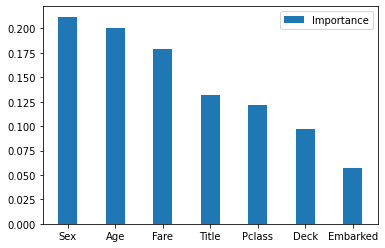

In [ ]:
plt.bar(importances["feature"],height=importances["importance"],label ="Importance", width=0.4)
plt.legend()
plt.show()